<a href="https://colab.research.google.com/github/elangbijak4/Riset-Smart-City/blob/main/Demo_EMS_pada_sisi_operator_Smart_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

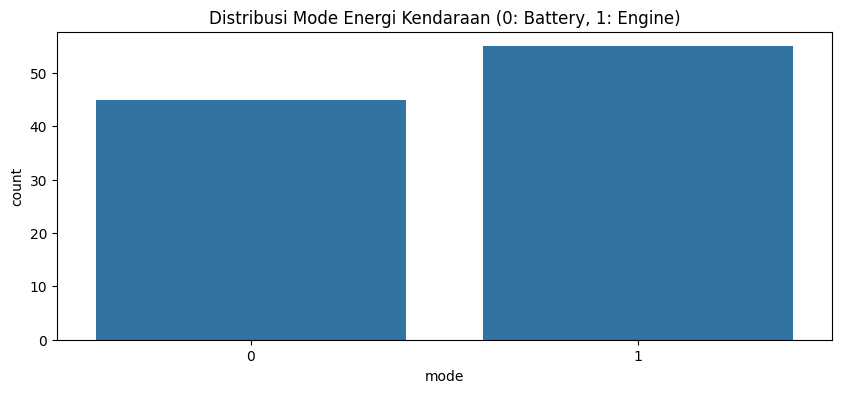

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulasi data 100 kendaraan
np.random.seed(42)
n = 100
speed = np.random.uniform(0, 120, n)
slope = np.random.uniform(-10, 10, n)
battery = np.random.uniform(0, 100, n)
zone = np.random.choice(['Zona A', 'Zona B', 'Zona C'], n)

# Fungsi penentuan mode dan estimasi emisi
def decide_mode(s, sl, b):
    if b > 50 and sl < 5:
        return 0  # Battery
    else:
        return 1  # Engine

def estimate_emission(mode, speed):
    return speed * 0.05 if mode == 1 else 0  # engine causes emission

# Hitung mode dan emisi
mode = [decide_mode(s, sl, b) for s, sl, b in zip(speed, slope, battery)]
emission = [estimate_emission(m, s) for m, s in zip(mode, speed)]

df_cars = pd.DataFrame({
    "speed": speed,
    "slope": slope,
    "battery": battery,
    "mode": mode,
    "emission": emission,
    "zone": zone
})

# Ringkasan makro
summary = {
    "avg_battery": df_cars["battery"].mean(),
    "avg_emission": df_cars["emission"].mean(),
    "mode_distribution": df_cars["mode"].value_counts(normalize=True).to_dict()
}

# Visualisasi distribusi mode
plt.figure(figsize=(10, 4))
sns.countplot(data=df_cars, x='mode')
plt.title("Distribusi Mode Energi Kendaraan (0: Battery, 1: Engine)")
plt.show()